# Part II - Ford GoBike Dataset Explanatory Visualizations Presentation
## by Thárcyla Mourão

## Dataset Overview

Ford GoBike was a bike-sharing system that covered the greater San Francisco Bay area from [2017](https://media.ford.com/content/fordmedia/fna/us/en/news/2017/06/27/ford-gobike-launching-in-bay-area-bike-sharing.html) to [2019](https://techcrunch.com/2019/06/11/lyft-deploys-its-pink-wheeled-bikes-and-rebrands-ford-gobike-as-bay-wheels/). This dataset has information on trips taken on February 2019. 

Among the information available in the dataset, I had start time, end time, names of the start and end stations, gender, birth year of users, among others.

The objective of this project as a whole was to create a series of exploratory and explanatory visualizations related to my main variable of interest, **trip duration**. The first part covered the exploratory charts, while the second part covered the explanatory data visualizations.

## Investigation Overview

In this presentation, I aim to focus on what factors influence trip duration. I'll start the presentation with a histogram for the trip duration distribution given its importance to this project.

Then, I'll move on to a heat map illustrating the relationship between trip duration and age, given that analysis showed that most of the trips were taken by people in their 20s to 40s. The plot also shows that most of the trips in that age bracket (in the whole dataset, really), are trips with less than 1,000 seconds (around 15 minutes).

Lastly, I'll then finish the presentation with a line plot of the average trip duration by hour, for every gender. This visualization was chosen since this single plot encapsulate a lot of the insights I've found throughout the exploration of this dataset. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('data/fordgobike.csv')

In [3]:
# preliminary wrangling 
# for detailed comments on this section, please, 
# refer to the PART 1 document

# drop nulls in place
df.dropna(inplace=True)

# reset index
df = df.reset_index(drop=True)

# list with the columns to convert
int_columns = ['start_station_id', 'end_station_id', 'member_birth_year']

# iterate through the list
for column in int_columns:
    df[column] = df[column].astype(int)
    
# turn user_type into a categorical variable
# list of user types available in the dataset
user_types = ['Customer', 'Subscriber']

# create categorical variable with the list
cat_user_types = pd.api.types.CategoricalDtype(ordered=False, categories=user_types)

# apply categorical variable to the column
df['user_type'] = df['user_type'].astype(cat_user_types)

# turn member_gender into a categorical variable
# list of genders available in the dataset
genders = ['Female', 'Male', 'Other']

# create categorical variable with the list
cat_genders = pd.api.types.CategoricalDtype(ordered=False, categories=genders)

# apply categorical variable to the column
df['member_gender'] = df['member_gender'].astype(cat_genders)

# convert start time and end time to datetime
dates = ['start_time', 'end_time']

for column in dates:
    df[column] = pd.to_datetime(df[column])
    
# create function to make the conversion
def convert_bool(value):
    if value == 'Yes':
        return True
    elif value == 'No':
        return False

df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].apply(convert_bool)

# use df.drop to drop the columns that won't be used in analysis
df.drop(['start_station_latitude', 
         'start_station_longitude', 
         'end_station_latitude', 
         'end_station_longitude',
         'bike_id'], axis=1, inplace=True)

In [4]:
# check to see if it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  int32         
 6   end_station_name         174952 non-null  object        
 7   user_type                174952 non-null  category      
 8   member_birth_year        174952 non-null  int32         
 9   member_gender            174952 non-null  category      
 10  bike_share_for_all_trip  174952 non-null  bool          
dtypes: bool(1), category(2), datetime64[ns](2), int32(3), int64(1), object(2)
memo

In [5]:
# print first few lines
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,Customer,1984,Male,False
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),Customer,1972,Male,False
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,Subscriber,1989,Other,False


## Distribution of Trip Duration

Making the log transformation made analysis easier. The resulting distribution resembles a normal one. Most trips take between 300 and 1000 seconds, i.e., between 5 and 15 minutes.

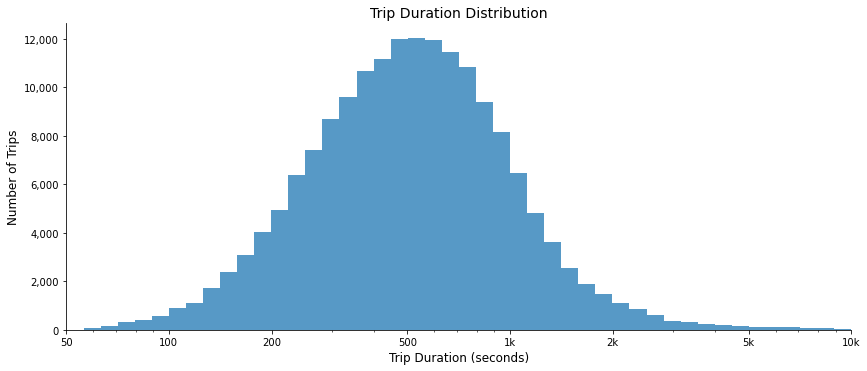

In [6]:
# set bins
bins = 10 ** np.arange(1.5, 5+0.05, 0.05)

# plot chart
sns.displot(df['duration_sec'], bins=bins)

# use log scale in the x-axis
plt.xscale('log')

# set the xticks and xtick labels
plt.xticks([0, 50, 100, 200, 500, 1e3, 2e3, 5e3, 1e4], [0, 50, 100, 200, 500, '1k', '2k', '5k', '10k'])

# format y-axis
plt.gca().yaxis.set_major_formatter('{x:,.0f}')

# crop x-axis to remove outliers
plt.xlim((50, 1e4))

# axis labels
plt.xlabel('Trip Duration (seconds)', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)

# increase figure size
plt.gcf().set_size_inches(14,5)

# set title
plt.title('Trip Duration Distribution', fontsize=14);

## Trip Duration vs. Age

Considering trips of up to 3600 seconds (an hour), the majority of them were taken by people in the 18-40 age bracket. The plot also showed that most of the trips in that age bracket, are trips with less than 1,000 seconds (around 15 minutes).

In [7]:
# set base color to prevent seaborn from using
# the whole standard qualitative palette unnecessarily
base_color = sns.color_palette()[0]

In [8]:
# create age column
# find the age users had in 2019 and 
# create a column with this information
df['age'] = 2019 - df['member_birth_year']

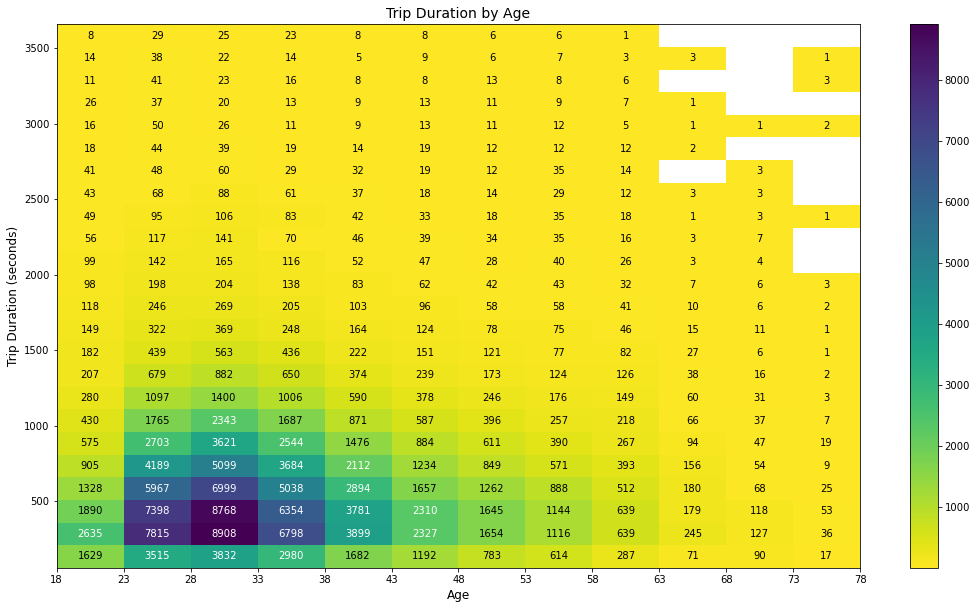

In [9]:
# bins for each axis considering their distribution
bins_x = np.arange(18, 78+5, 5)

# limit y-axis bins to 3600 so chart is interpreted more easily 
bins_y = np.arange(60, 3600+150, 150)

# plot heatmap
plt.figure(figsize=[18,10])
h2d = plt.hist2d(data=df, x='age', y='duration_sec', cmin=0.1, cmap='viridis_r', bins=[bins_x, bins_y])
plt.colorbar()
plt.xticks(range(18,80+1,5))
plt.ylabel('Trip Duration (seconds)', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.title('Trip Duration by Age', fontsize=14);

# print counts on each block
counts = h2d[0]

for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i, j]
        if c >= 2e3:
            plt.text(bins_x[i]+2.5, bins_y[j]+75, int(c),
                    ha='center', va='center', color='white')
        elif c > 0:
            plt.text(bins_x[i]+2.5, bins_y[j]+75, int(c),
                      ha='center', va='center', color='black')

## Trip Start Hour vs. Average Trip Duration by Gender

In this plot, we can see that non-binary people enjoy longer trips during the earlier hours of the day (from 1 a.m. to 4 a.m.), with smaller peaks at other times of the day. In addition to that, there is also a modest peak from females during the same time period. This might suggest they'd rather grab a bike after a night out than walking home, but that assertion would require further investigation. During the rest of the day, their average trip duration is somewhat stable, with an increase from late morning to late afternoon. Finally, males also present an even smaller peak during the same time period, but for the most part, their average trip duration remains more or less stable during the whole day.

In [10]:
# create a column with the starting hour of every trip
df['hour'] = df['start_time'].dt.hour

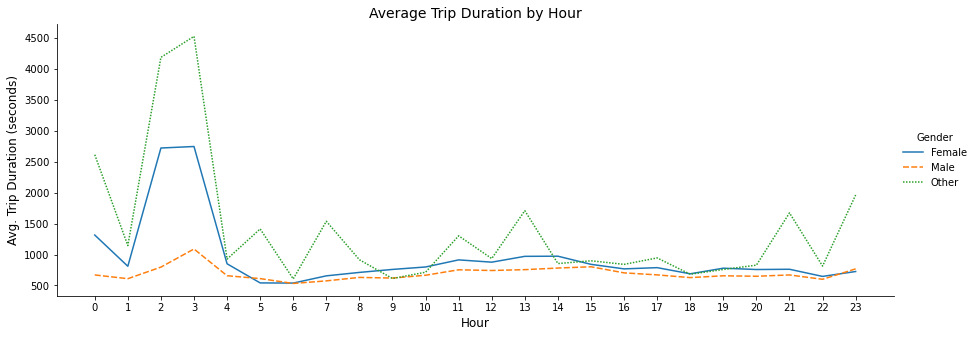

In [11]:
# set figure size
plt.figure(figsize=[15,5])

# plot chart with hour in the x-axis, trip duration in the y-axis and gender as hue
sns.lineplot(data=df, x='hour', y='duration_sec', hue='member_gender', style='member_gender', ci=None)

# remove top and right spines
sns.despine()

# set x-ticks
plt.xticks(range(0,24))

# set and customize plot legend
plt.legend(title='Gender', frameon=False, loc=6, bbox_to_anchor=(1.0, 0.5))

# axes labels and title
plt.ylabel('Avg. Trip Duration (seconds)', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.title('Average Trip Duration by Hour', fontsize=14);

In [ ]:
!jupyter nbconvert Part_II_Explanatory-Presentation.ipynb --to slides --post serve --no-input --no-prompt